#Libraries and Data

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [155]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [156]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_pacf


In [157]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

Data Loading

In [158]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/exponential_smoothing_and_hot_winters/weekly_customer_complaints.csv',index_col='week',parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [159]:
#info about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


#Data Pre-processing

In [160]:
#remove comma and transform to float

df['complaints']=df['complaints'].str.replace(',','').astype(float)



In [161]:
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


In [162]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [163]:
df =df.asfreq('W-Mon')

df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

#EDA (Exploratory Data Analysis)

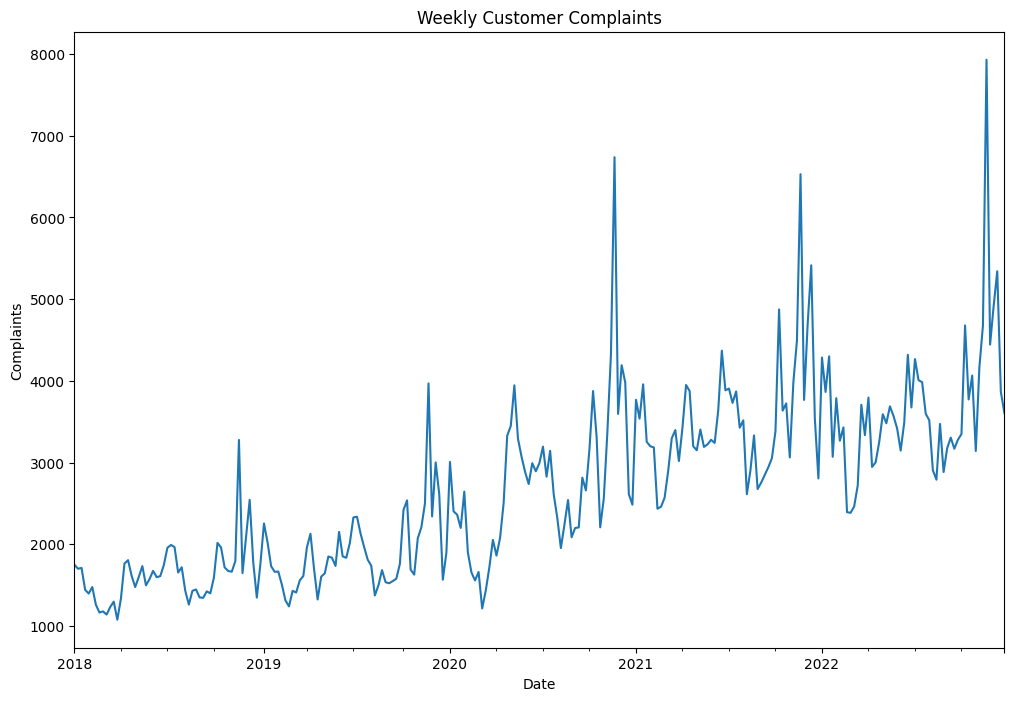

In [164]:
df['complaints'].plot(figsize=(12,8))
plt.title('Weekly Customer Complaints')
plt.xlabel('Date')
plt.ylabel('Complaints')
plt.show()

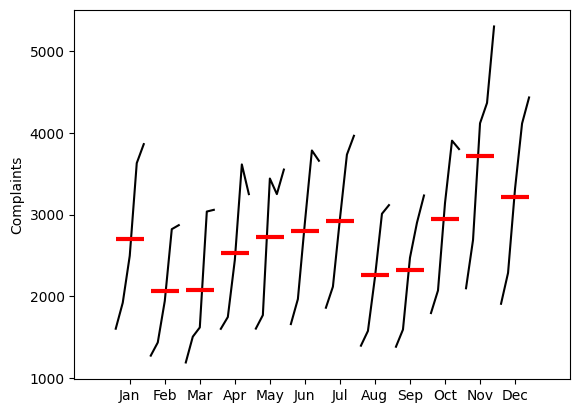

In [165]:
#plotting the monthly seasonality

month_plot(df['complaints'].resample('ME').mean(),ylabel='Complaints')

plt.show()

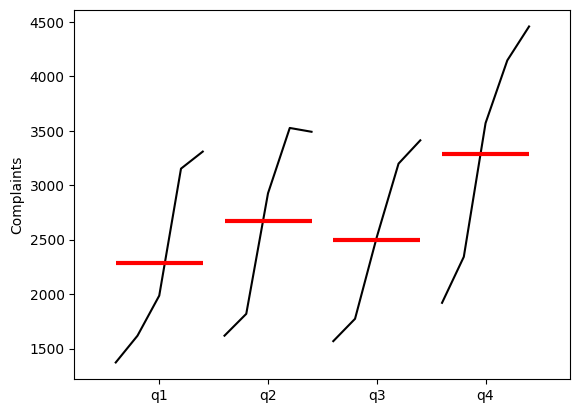

In [166]:
#plotting the quaterly seasonality

quarter_plot(df['complaints'].resample('QE').mean(),ylabel='Complaints')

plt.show()

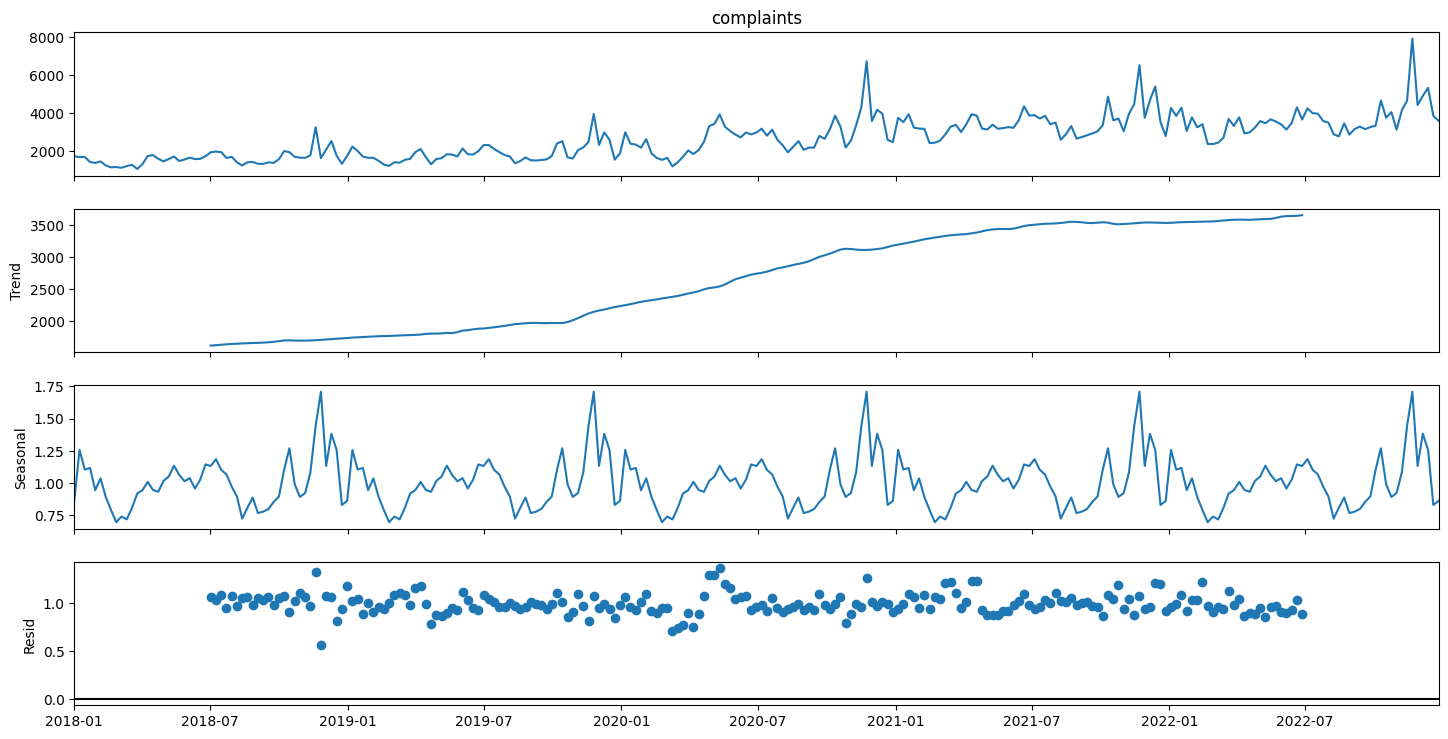

In [167]:
#seasonal decompostion plot for customer complaint data

decomposition =seasonal_decompose(df['complaints'],model='multiplicative',period=52)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

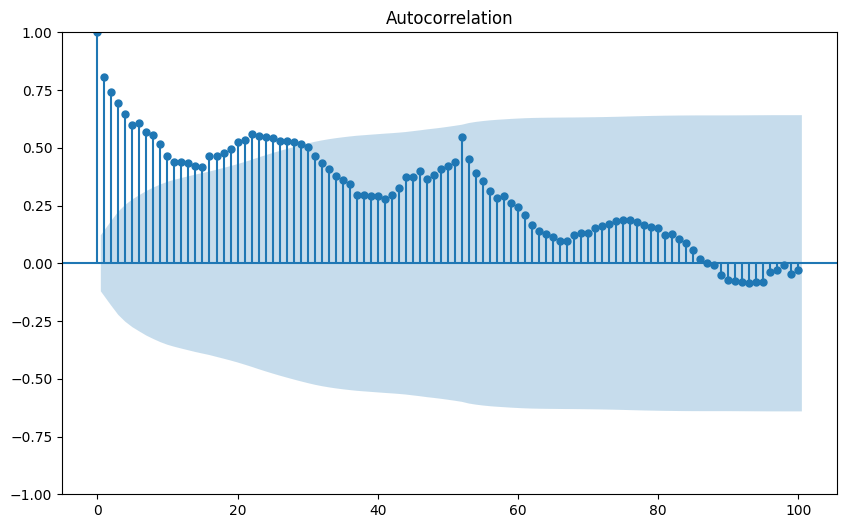

In [168]:
#Plot the autocorrelation (ACF)  customer data

fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df['complaints'],lags=100,ax=ax)
plt.show()

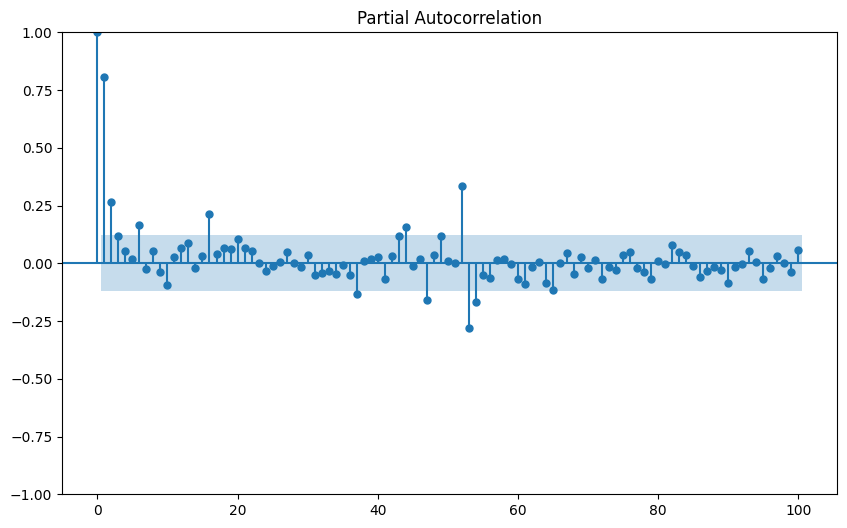

In [169]:
#Plot the partial autocorrelation (PACF)  customer data

fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df['complaints'],lags=100,ax=ax)
plt.show()

#Train and Test split

In [170]:
#Goal is to predict the next quater (13 weeks)


In [171]:
#train and test split
periods = 13
train =df.iloc[:-periods,0]
test =df.iloc[-periods:,0]

In [172]:
print(train.shape)
print(test.shape)

(248,)
(13,)


In [173]:
test.head()

,complaints
week,
2022-10-03,3350.0
2022-10-10,4679.0
2022-10-17,3773.0
2022-10-24,4065.0
2022-10-31,3142.0


#Simple Exponential Smoothing

In [174]:
#simple exponetial smoothing model and prediction

model_simple = SimpleExpSmoothing(train)
model_simple_fit = model_simple.fit()



In [175]:
predictions_simple = model_simple_fit.forecast(len(test))

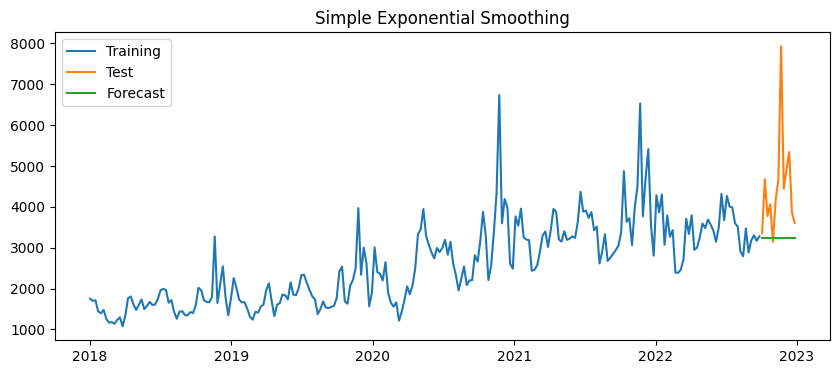

In [176]:
#training test and forcast
plt.figure(figsize=(10,4))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(predictions_simple,label='Forecast')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

#Double exponential smoothis

In [177]:
model_double = ExponentialSmoothing(train,trend='add',seasonal=None)
model_double_fit = model_double.fit()

In [178]:
predictions_double = model_double_fit.forecast(len(test))

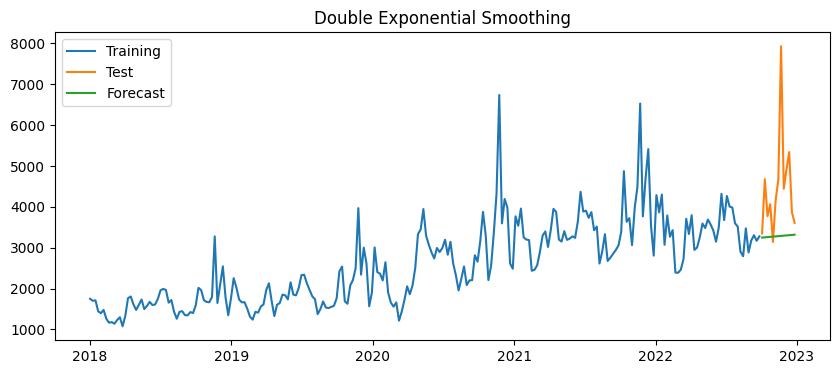

In [179]:
plt.figure(figsize=(10,4))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(predictions_double,label='Forecast')
plt.title('Double Exponential Smoothing')
plt.legend()

#Triple exponential smoothing (Holt-Winters Method)


In [180]:
model_double_triple = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=52)
model_double_triple_fit = model_double_triple.fit()

In [181]:
predictions_double_triple = model_double_triple_fit.forecast(len(test))

In [182]:
print(predictions_double_triple)

2022-10-03    4041.207635
2022-10-10    5040.723320
2022-10-17    3932.012234
2022-10-24    3531.280108
2022-10-31    3441.245496
2022-11-07    4260.279187
2022-11-14    5352.834107
2022-11-21    7238.316196
2022-11-28    4359.198254
2022-12-05    5316.729751
2022-12-12    5271.572322
2022-12-19    3472.026089
2022-12-26    3336.797546
Freq: W-MON, dtype: float64


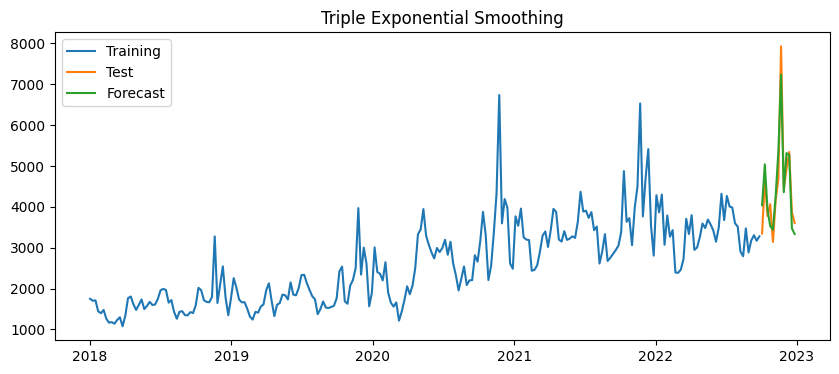

In [183]:
plt.figure(figsize=(10,4))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(predictions_double_triple,label='Forecast')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

#Calculating the MAE,RMSE,MAPE

In [184]:
mae=mean_absolute_error(test,predictions_double_triple)
rmse=np.sqrt(mean_squared_error(test,predictions_double_triple))
mape=mean_absolute_percentage_error(test,predictions_double_triple)

print(f'MAE:{mae:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAPE:{100 * mape:.2f}%')

MAE:363.68
RMSE:425.48
MAPE:8.44%


In [185]:
#Function to assess model and visualize outcome

def assess_model(model_name,train,test,predictions,chart_title):
  mae=mean_absolute_error(test,predictions)
  rmse=np.sqrt(mean_squared_error(test,predictions))
  mape=mean_absolute_percentage_error(test,predictions)

  print(f'Model:{model_name}')
  print(f'MAE:{mae:.2f}')
  print(f'RMSE:{rmse:.2f}')
  print(f'MAPE:{100 * mape:.2f}%')
  plt.figure(figsize=(10,4))
  plt.plot(train,label='Training')
  plt.plot(test,label='Test')
  plt.plot(predictions,label='Forecast')
  plt.title(chart_title)
  plt.legend()
  plt.show()
  return mae,rmse,mape



Model:Triple Exponential Smoothing
MAE:363.68
RMSE:425.48
MAPE:8.44%


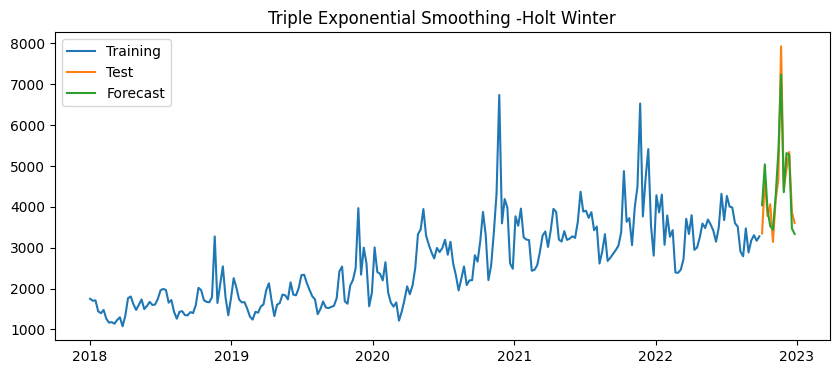

(363.6800935213852, np.float64(425.4847284856404), 0.0844205242838066)

In [186]:
assess_model('Triple Exponential Smoothing',train,test,predictions_double_triple,'Triple Exponential Smoothing -Holt Winter')

Model:Triple Exponential Smoothing
MAE:363.68
RMSE:425.48
MAPE:8.44%


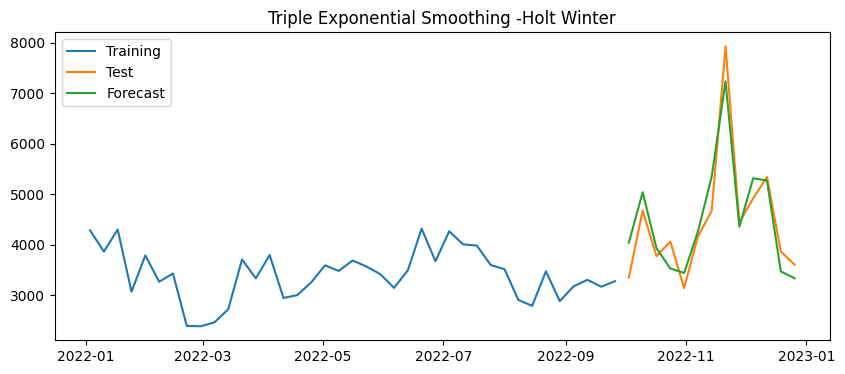

(363.6800935213852, np.float64(425.4847284856404), 0.0844205242838066)

In [187]:
assess_model('Triple Exponential Smoothing',train['2022':],test,predictions_double_triple,'Triple Exponential Smoothing -Holt Winter')

#Predicting the future

In [188]:
#triple exponential smoothing to predict the future  ,include the whole data as training data

In [189]:
model = ExponentialSmoothing(df.complaints,trend='add',seasonal='mul',seasonal_periods=52).fit()
# model_double_triple_fit = model_double_triple.fit()

In [190]:
n =13

In [191]:
forcast= model.forecast(n)

In [192]:
print(forcast)

2023-01-02    4965.837323
2023-01-09    4478.091513
2023-01-16    4699.515551
2023-01-23    3814.120124
2023-01-30    4242.022859
2023-02-06    3726.289686
2023-02-13    3385.531813
2023-02-20    2879.458647
2023-02-27    2978.582150
2023-03-06    3044.198652
2023-03-13    3430.481393
2023-03-20    3923.811512
2023-03-27    3794.548666
Freq: W-MON, dtype: float64


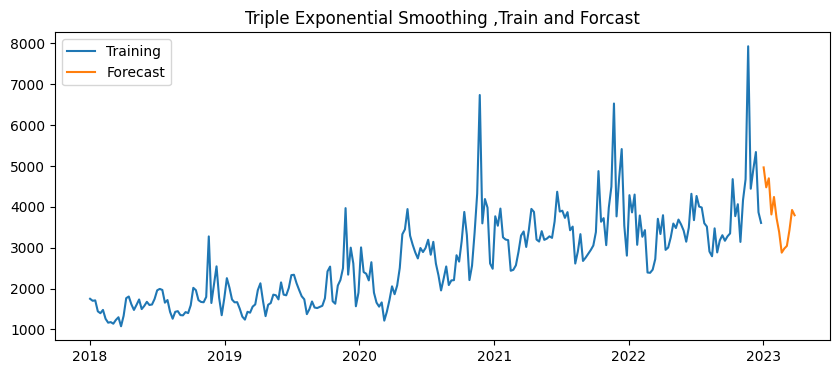

In [193]:
#Plot training and forcast

plt.figure(figsize=(10,4))
plt.plot(df.complaints,label='Training')
# plt.plot(test,label='Test')
plt.plot(forcast,label='Forecast')
plt.title('Triple Exponential Smoothing ,Train and Forcast')
plt.legend()
plt.show()

In [194]:
#Function to plot the future

def plot_future(y,forcast,title):
  plt.figure(figsize=(10,4))
  plt.plot(y,label='Training')
  # plt.plot(test,label='Test')
  plt.plot(forcast,label='Forecast')
  plt.title(f"Train and Forcast with {title}")

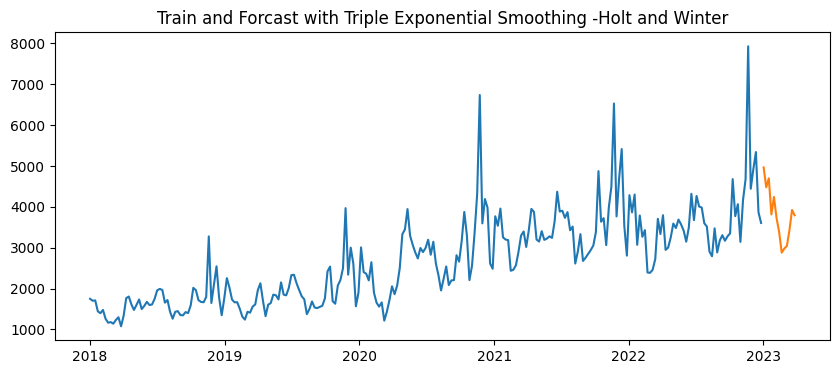

In [195]:
plot_future(df.complaints,forcast,'Triple Exponential Smoothing -Holt and Winter')

#Daily Data

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_pacf
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [197]:
df_daily =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/exponential_smoothing_and_hot_winters/bitcoin_price.csv',index_col='Date',parse_dates=True)
df_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [198]:
#info about the df
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [199]:
df_daily =df_daily.asfreq('D')

df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

In [200]:
df_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [201]:
#train and test split
periods = 30
train =df_daily.iloc[:-periods,3]
test =df_daily.iloc[-periods:,3]

In [202]:
train.head()

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [203]:
print(train.shape)
print(test.shape)

(3362,)
(30,)


In [204]:
model_triple = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=7).fit()


In [205]:
predictions_triple = model_triple.forecast(len(test))

In [206]:
print(predictions_triple)

2023-12-01    37766.446304
2023-12-02    37812.706424
2023-12-03    37831.796584
2023-12-04    37825.419775
2023-12-05    37797.875217
2023-12-06    37868.317119
2023-12-07    37661.686449
2023-12-08    37715.313955
2023-12-09    37761.511443
2023-12-10    37780.575756
2023-12-11    37774.207582
2023-12-12    37746.700317
2023-12-13    37817.046846
2023-12-14    37610.695936
2023-12-15    37664.250835
2023-12-16    37710.385776
2023-12-17    37729.424277
2023-12-18    37723.064725
2023-12-19    37695.594702
2023-12-20    37765.845988
2023-12-21    37559.774459
2023-12-22    37613.256849
2023-12-23    37659.329328
2023-12-24    37678.342053
2023-12-25    37671.991111
2023-12-26    37644.558280
2023-12-27    37714.714452
2023-12-28    37508.921925
2023-12-29    37562.331905
2023-12-30    37608.342005
Freq: D, dtype: float64


In [207]:
# plt.figure(figsize=(10,4))
# plt.plot(train,label='Training')
# plt.plot(test,label='Test')
# plt.plot(predictions_double_triple,label='Forecast')
# plt.title('Triple Exponential Smoothing')
# plt.legend()
# plt.show()

Model:Triple Exponential Smoothing
MAE:4846.94
RMSE:5040.24
MAPE:11.29%


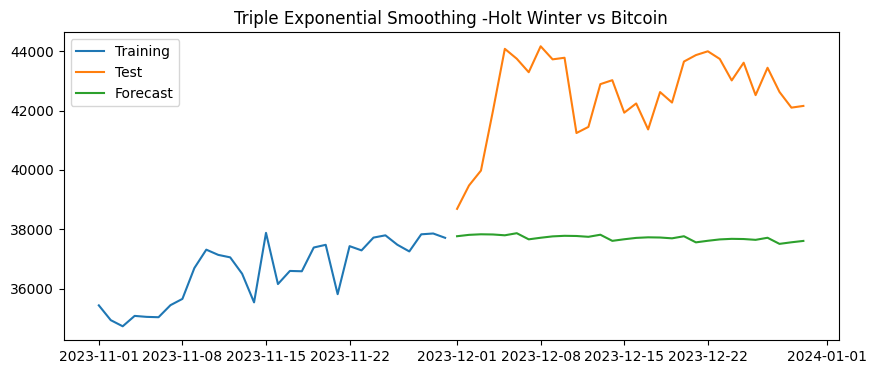

(4846.936111435845, np.float64(5040.240356290038), 0.11293761718348146)

In [208]:
assess_model('Triple Exponential Smoothing',train['2023-11':],test,predictions_triple,'Triple Exponential Smoothing -Holt Winter vs Bitcoin')